In [1]:
# !pip install xgboost

In [2]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [4]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [5]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv('BayesianRidge_Pre/Input_A6_024.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [7]:
title = ['Input_A6_022','Input_A6_023']

# title = ['Input_A6_023']

In [8]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [53]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

In [9]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [10]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [12]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


In [13]:
y_pred = lasso.predict(X_test)

In [14]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.5915


In [15]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage mse score: inf


In [16]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 0


In [17]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.007883


In [18]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    105.000000
mean            inf
std             NaN
min       99.077705
10%       99.346327
20%       99.346327
30%       99.430387
40%       99.430387
50%       99.430387
60%      100.000511
70%      100.000511
80%             inf
90%             inf
max             inf
Name: Predict, dtype: float64

In [19]:
lasso.coef_

array([0.38866555, 0.        ])

# Linear regresssion

In [20]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [21]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.000006


In [22]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.002438


In [23]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.9609


In [24]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("Linear regression score: %.4f"
      % regr.score(X_train,y_train))

Linear regression score: 0.9427


In [25]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: inf


In [26]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, y_pred, 15))

Number lower than error: 76


In [30]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    105.000000
mean            inf
std             NaN
min        0.044105
10%        0.166227
20%        0.166227
30%        0.797222
40%        0.797222
50%        0.797222
60%        1.726759
70%        5.588322
80%             inf
90%             inf
max             inf
Name: Predict, dtype: float64

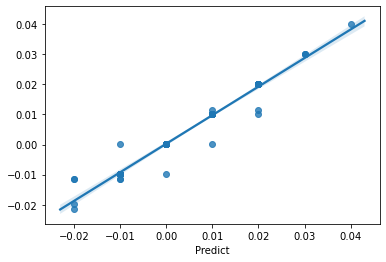

In [28]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, y_pred)

In [29]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - y_pred)

(28.876852367678396, 0.0)

# XGBoost regression

In [31]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [32]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':[50,60,70,80,90,100,120,150,200,250,260],
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 33 candidates, totalling 99 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1941s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done  39 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0850s.) Setting batch_size=8.


best params
{'booster': 'gbtree', 'n_estimators': 250}
best score
0.9129245143909994


[Parallel(n_jobs=6)]: Done  99 out of  99 | elapsed:    3.9s finished


# 調 max_depth / min_child_weight

In [33]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 250, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0419s.) Setting batch_size=8.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done  76 tasks      | elapsed:    0.5s


best params
{'max_depth': 1, 'min_child_weight': 1}
best score
0.9133004980481986


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.0s finished


# 調 gamma

In [34]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 250, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0459s.) Setting batch_size=8.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  13 out of  21 | elapsed:    0.0s remaining:    0.0s


best params
{'gamma': 0}
best score
0.9133004980481986


[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.2s finished


# 調 subsample / colsample_bytree

In [35]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 250, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0379s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  22 tasks      | elapsed:    0.2s


best params
{'colsample_bytree': 0.2, 'subsample': 0.8}
best score
0.9133004980481986


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    0.8s finished


# reg_alpha / reg_lambda

In [36]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 250, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.8,'colsample_bytree': 0.2}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0479s.) Setting batch_size=8.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.2s


best params
{'reg_alpha': 0, 'reg_lambda': 1}
best score
0.9133004980481986


[Parallel(n_jobs=6)]: Done  76 out of 126 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    0.6s finished


# learning_rate

In [37]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}

other_params = {'booster':'gbtree', 'n_estimators': 250, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.8,'colsample_bytree': 0.2,'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best params
{'learning_rate': 0.1}
best score
0.9133004980481986


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0390s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.0s finished


In [38]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.1,
              booster = 'gbtree', 
              n_estimators = 250, 
              max_depth = 1, 
              min_child_weight = 1,
              seed = 42,
              gamma = 0,
              subsample = 0.8,
              colsample_bytree = 0.2,
              reg_alpha =  0,
              reg_lambda = 1)

best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred = best_xgb_model.predict(X_test)

In [40]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.9497


In [41]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage rmse score: inf


In [42]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 76


In [43]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.002767


In [44]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    105.000000
mean            inf
std             NaN
min        0.724300
10%        0.858808
20%        1.293120
30%        3.239012
40%        3.486180
50%        3.486180
60%        3.486180
70%        9.148774
80%             inf
90%             inf
max             inf
Name: Predict, dtype: float64

In [45]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,y_train))

XGBoost regression score: 0.9374


In [46]:
# XGBoost
xgb = XGBRegressor(booster = 'gblinear', loss = 'reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

[00:26:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [51]:
print("R2 score:: %.2f"
      % r2_score(y_test,y_pred))

R2 score:: 0.96


In [48]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 77


In [49]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.002544


In [52]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    105.000000
mean            inf
std             NaN
min        0.013902
10%        0.362664
20%        0.362664
30%        1.060187
40%        1.060187
50%        1.060187
60%        1.729906
70%        1.729906
80%             inf
90%             inf
max             inf
Name: Predict, dtype: float64

In [ ]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 